samples in X: 2377
samples in y: 2377
training set samples: 2000
testing set samples: 377
MSE: 8.860385931326258
R squared error: 0.9933006083217008


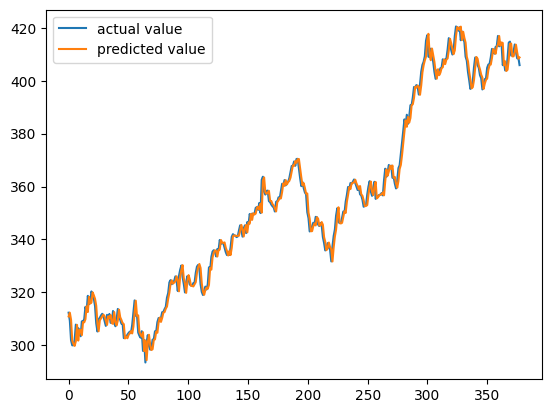

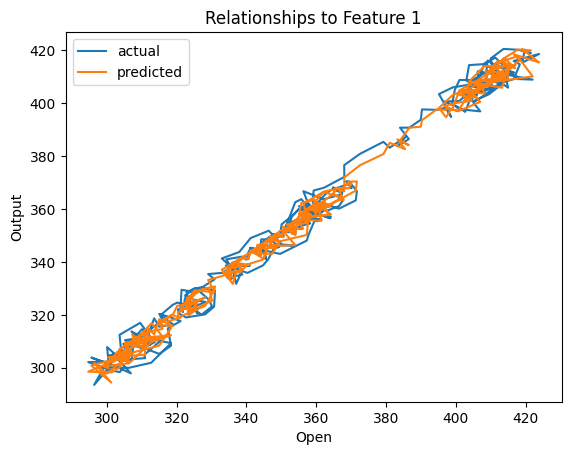

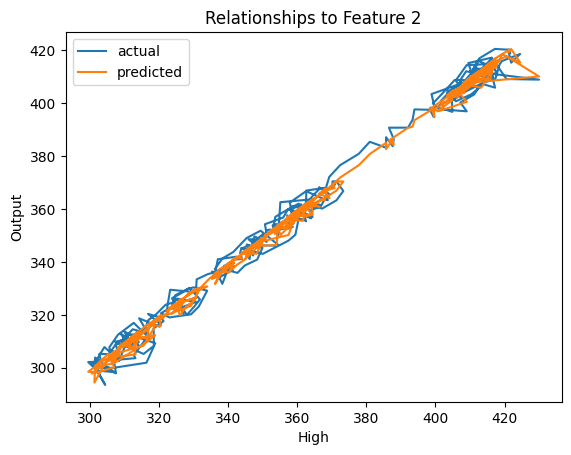

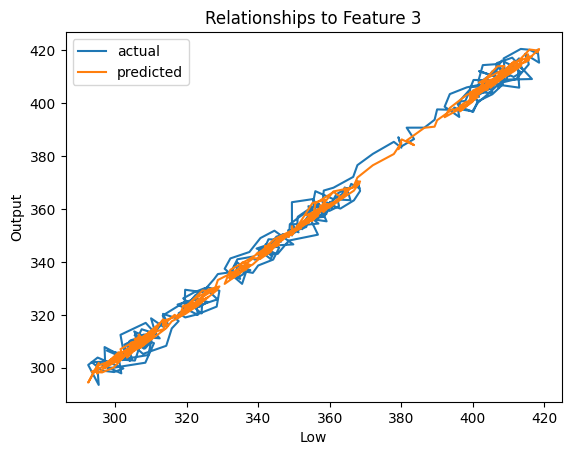

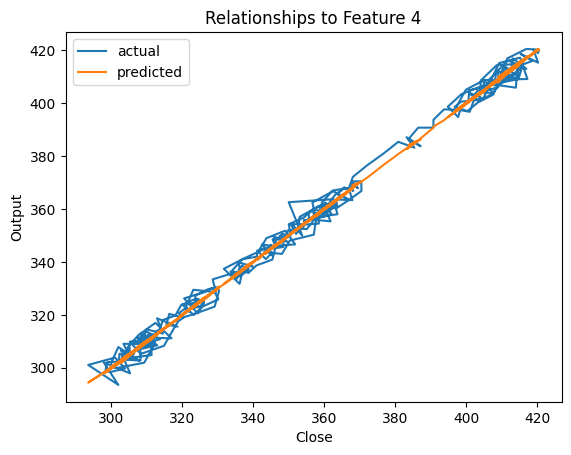

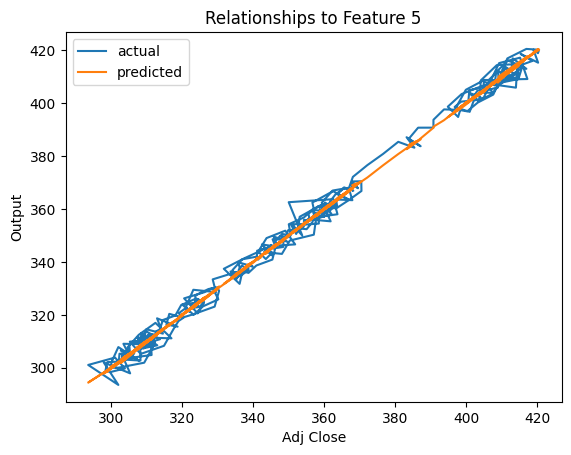

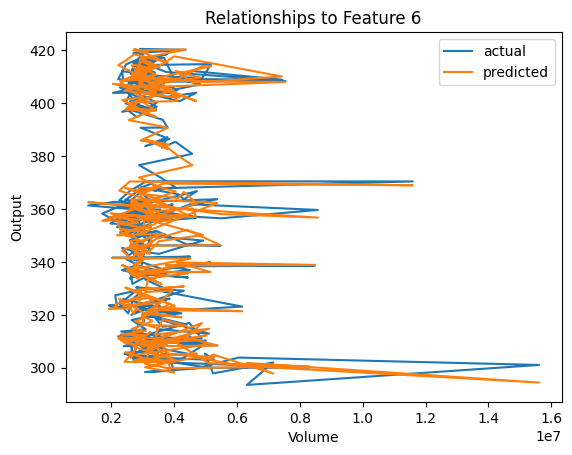

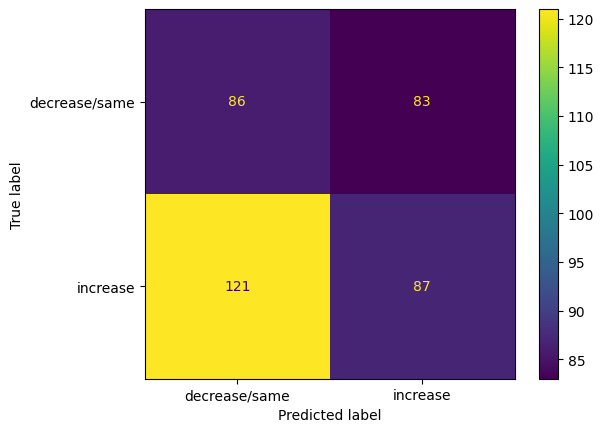

              precision    recall  f1-score   support

           0       0.42      0.51      0.46       169
           1       0.51      0.42      0.46       208

    accuracy                           0.46       377
   macro avg       0.46      0.46      0.46       377
weighted avg       0.47      0.46      0.46       377



In [3]:
#Simple Linear Regression Test 
#9/30/2024

import joblib
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('berkshire_hathaway_data.csv')

#All given features
X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

#next day, 5 days out, and thirty days out
y1 = data[['N. D. C.']].values
y5 = data[['Five Out']].values
y30 = data[['Thirty Out']].values

#decide what length to test for
y = y1

#set up vectors
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325)
print(f'samples in X: {X.shape[0]}\nsamples in y: {y.shape[0]}')
split_point = 2000
X_train = X[:split_point]
X_test = X[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]
print(f'training set samples: {X_train.shape[0]}\ntesting set samples: {X_test.shape[0]}')

test_size = np.array(X_test.shape[0])           #for graphing
x_axis = np.linspace(0,test_size, test_size)    #for graphing

#train and evaluate model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Pickle model
joblib.dump(lin_reg_model, './lin_reg_model.pkl')

y_linreg = lin_reg_model.predict(X_test)
r2_linreg = r2_score(y_test, y_linreg)
mse_linreg = mean_squared_error(y_test, y_linreg)
print(f'MSE: {mse_linreg}\nR squared error: {r2_linreg}')

#compare real values and what was predicted, graphically 
plt.plot(x_axis, y_test, label = 'actual value')
plt.plot(x_axis, y_linreg, label = 'predicted value')
plt.legend()
plt.show()

#compare a given day's close (left) with forecasted close after however many days (right)
##to see if the predicted change is significant
    #comp = np.c_[X_test[:,3], y_linreg]
    #print(comp)


#show relationship between features and output
open_feature = data[['Open']].values[split_point:]
plt.plot(open_feature, y_test, label = 'actual')
plt.plot(open_feature, y_linreg, label = 'predicted')
plt.xlabel("Open")
plt.ylabel("Output")
plt.title("Relationships to Feature 1")
plt.legend()
plt.show()

high_feature = data[['High']].values[split_point:]
plt.plot(high_feature, y_test, label = 'actual')
plt.plot(high_feature, y_linreg, label = 'predicted')
plt.xlabel("High")
plt.ylabel("Output")
plt.title("Relationships to Feature 2")
plt.legend()
plt.show()

low_feature = data[['Low']].values[split_point:]
plt.plot(low_feature, y_test, label = 'actual')
plt.plot(low_feature, y_linreg, label = 'predicted')
plt.xlabel("Low")
plt.ylabel("Output")
plt.title("Relationships to Feature 3")
plt.legend()
plt.show()

close_feature = data[['Close']].values[split_point:]
plt.plot(close_feature, y_test, label = 'actual')
plt.plot(close_feature, y_linreg, label = 'predicted')
plt.xlabel("Close")
plt.ylabel("Output")
plt.title("Relationships to Feature 4")
plt.legend()
plt.show()

adjclose_feature = data[['Adj Close']].values[split_point:]
plt.plot(adjclose_feature, y_test, label = 'actual')
plt.plot(adjclose_feature, y_linreg, label = 'predicted')
plt.xlabel("Adj Close")
plt.ylabel("Output")
plt.title("Relationships to Feature 5")
plt.legend()
plt.show()

volume_feature = data[['Volume']].values[split_point:]
plt.plot(volume_feature, y_test, label = 'actual')
plt.plot(volume_feature, y_linreg, label = 'predicted')
plt.xlabel("Volume")
plt.ylabel("Output")
plt.title("Relationships to Feature 6")
plt.legend()
plt.show()



#now try classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

clas_y = []
for i in range(0, len(y_test)):
    if (y_test[i] > X_test[i][4]): clas_y.append(1)
    else: clas_y.append(0)

clas_yhat = []
for i in range(0, len(y_linreg)):
    if (y_linreg[i] > X_test[i][4]): clas_yhat.append(1)
    else: clas_yhat.append(0)

cm = confusion_matrix(clas_y, clas_yhat)
disp = ConfusionMatrixDisplay.from_predictions(clas_y, clas_yhat, display_labels=['decrease/same', 'increase'])
plt.show()
print(classification_report(clas_y, clas_yhat))